In [2]:
import pandas as pd 


In [3]:

MERGED_DATA = pd.read_csv('MERGED_DATA.csv')

In [4]:
import pandas as pd

df_merged = pd.read_csv('MERGED_DATA.csv')

In [5]:
df_merged.columns 

Index(['EMPLOYEE_ID', 'CERTIFICATE_NAME', 'ISSUING_ORGANIZATION', 'ISSUE_DATE',
       'EXPIRE_DATE', 'CREDENTIAL_ID', 'CERTIFICATE_STATUS', 'FIRST_NAME',
       'LAST_NAME', 'EMAIL', 'USERTYPE', 'DATE_OF_BIRTH', 'GENDER', 'PHONENO',
       'ADDRESS', 'EVENT_NAME', 'TOTAL_CAPACITY', 'START_DATE', 'END_DATE',
       'TRAINEE_NAME', 'MODE', 'MEETING_LINK', 'VENUE', 'SKILLS', 'RATING',
       'USER_EMAIL', 'PROJECT_NAME', 'TECHSTACK_USED', 'STATUS'],
      dtype='object')

In [6]:
df_merged = df_merged.drop(columns=['ISSUING_ORGANIZATION','ISSUE_DATE',
       'EXPIRE_DATE', 'CREDENTIAL_ID','EMAIL', 'USERTYPE', 'DATE_OF_BIRTH', 'GENDER', 'PHONENO',
       'ADDRESS','TOTAL_CAPACITY', 'START_DATE', 'END_DATE',
       'TRAINEE_NAME', 'MODE', 'MEETING_LINK', 'VENUE', 'USER_EMAIL','STATUS'])

In [7]:
df_merged.columns 

Index(['EMPLOYEE_ID', 'CERTIFICATE_NAME', 'CERTIFICATE_STATUS', 'FIRST_NAME',
       'LAST_NAME', 'EVENT_NAME', 'SKILLS', 'RATING', 'PROJECT_NAME',
       'TECHSTACK_USED'],
      dtype='object')

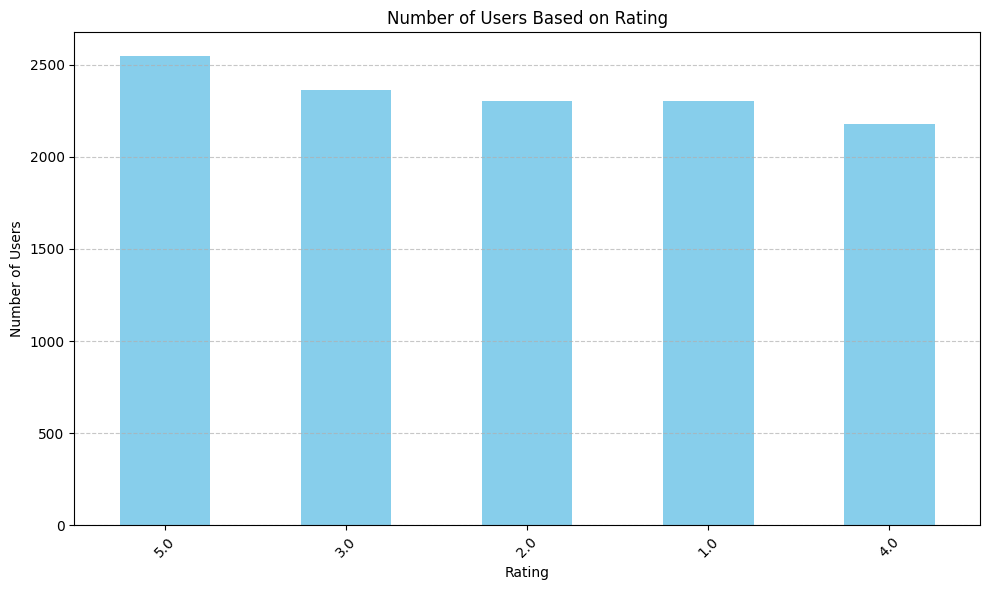

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
data = pd.read_csv('MERGED_DATA.csv')

# Count the number of users based on rating
rating_counts = data['RATING'].value_counts()

# Plot the data
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Users Based on Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


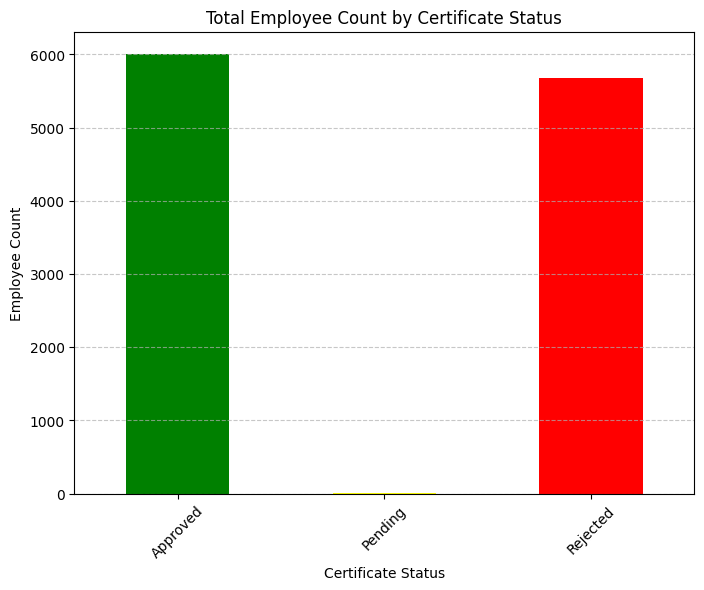

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from CSV into a DataFrame
df = pd.read_csv('MERGED_DATA.csv')

# Group the data by 'CERTIFICATE_STATUS' and count the number of employees for each status
status_counts = df.groupby('CERTIFICATE_STATUS').size()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
status_counts.plot(kind='bar', color=['green', 'yellow', 'red'])
plt.title('Total Employee Count by Certificate Status')
plt.xlabel('Certificate Status')
plt.ylabel('Employee Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:

df_merged.iloc[4]


EMPLOYEE_ID                                          EMP2
CERTIFICATE_NAME                                      AWS
CERTIFICATE_STATUS                               Approved
FIRST_NAME                                        Vincent
LAST_NAME                                            Cain
EVENT_NAME                               Machine Learning
SKILLS                                                AWS
RATING                                                2.0
PROJECT_NAME          Virtual Reality Training Simulation
TECHSTACK_USED                                         C#
Name: 4, dtype: object

In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# # Load the data
# df = pd.read_csv('MERGED_DATA.csv')

# # Fill all null values with empty strings
# df = df.fillna('')

# # Concatenate skills and tech stacks into a single column
# df['SKILLS_AND_TECHSTACK'] = df['SKILLS'] + ' ' + df['TECHSTACK_USED']

# # Fit TF-IDF vectorizer
# tfidf_vectorizer = TfidfVectorizer()
# tfidf_matrix = tfidf_vectorizer.fit_transform(df['SKILLS_AND_TECHSTACK'])

# # Calculate cosine similarity
# cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# # Function to recommend training based on employee ID
# def recommend_training(employee_id, cosine_sim=cosine_sim, df=df):
#     idx = df[df['EMPLOYEE_ID'] == employee_id].index[0]
#     sim_scores = list(enumerate(cosine_sim[idx]))
#     sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
#     sim_scores = sim_scores[1:6]  # Top 5 similar users
#     similar_users = [i[0] for i in sim_scores]
#     recommendations = df.iloc[similar_users]['CERTIFICATE_NAME'].unique()
#     return recommendations

# # Iterate over each employee and print unique recommendations

# recommendations = recommend_training('EMP4')
# print("Employee ID:",'EMP4')
# for certificate_name in recommendations:
#     print("  -", certificate_name)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Read the data
df_merged = pd.read_csv('MERGED_DATA.csv')

# Feature Engineering
df_merged['HAS_SKILLS_CERT_TECH'] = ((df_merged['SKILLS'].notnull()) | 
                                     (df_merged['CERTIFICATE_NAME'].notnull()) | 
                                     (df_merged['TECHSTACK_USED'].notnull())).astype(int)

# Additional feature: Total experience
df_merged['TOTAL_EXPERIENCE'] = pd.to_datetime(df_merged['END_DATE']) - pd.to_datetime(df_merged['START_DATE'])
df_merged['TOTAL_EXPERIENCE'] = df_merged['TOTAL_EXPERIENCE'].dt.days

# Define features and target variable
X = df_merged[['HAS_SKILLS_CERT_TECH', 'RATING', 'TOTAL_EXPERIENCE']]
y = df_merged['EVENT_NAME']

# Drop rows with missing target values
X = X[~y.isnull()]
y = y.dropna()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, max_iter=1000)

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model from the grid search
best_log_reg_model = grid_search.best_estimator_

def recommend_events_for_employee(employee_id):
    employee_data = df_merged[df_merged['EMPLOYEE_ID'] == employee_id]
    if employee_data.empty:
        return "No events recommended"
    
    # Extract features for prediction
    features = employee_data[['HAS_SKILLS_CERT_TECH', 'RATING', 'TOTAL_EXPERIENCE']]
    
    # Impute missing values with mean
    features_imputed = imputer.transform(features)
    
    # Scale features
    features_scaled = scaler.transform(features_imputed)
    
    # Predict probabilities for each class
    event_probabilities = best_log_reg_model.predict_proba(features_scaled)
    
    # Get the class labels
    class_labels = best_log_reg_model.classes_
    
    # Get the top recommended events
    top_event_indices = event_probabilities.argsort()[0][-5:][::-1]  # Get top 5 recommended events
    recommended_events = [class_labels[i] for i in top_event_indices]
    
    return recommended_events

# Example usage:
employee_id = "EMP123"  # Replace with the desired employee ID
recommended_events = recommend_events_for_employee(employee_id)
print("Recommended events for employee", employee_id, ":", recommended_events)



Recommended events for employee EMP123 : ['Machine Learning', 'PHP', 'Documentation', 'Penetration Testing', 'Vue.js']
